# Практика 06. Визуализация данных с использованием библиотек Matplotlib, Seaborn. Построение различных типов графиков. Настройка графиков: заголовки, метки осей, легенды, стилизация

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
from datetime import datetime

In [3]:
# Вывод на экран текущей версии библиотеки matplotlib
print ('Current version on matplotlib library is', mpl.__version__)

Current version on matplotlib library is 3.7.1


### 01. Построение графиков

Самым главным объектом в matplotlib является рисунок **Figure (метод plt.figure())**. Создать рисунок в matplotlib означает задать форму, размеры и свойства основы-холста (canvas), на котором будет создаваться будущий график.<br>

Для вывода созданных рисунков на экран можно вызвать метод plt.show(). Будут показаны все рисунки (figures), которые были созданы.

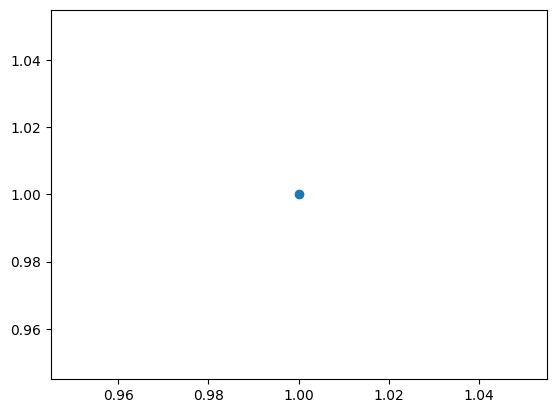

In [4]:
# Нарисуем точку

# Создание объекта Figure
fig = plt.figure()

# scatter - метод для нанесения маркера в точке (1.0, 1.0)
plt.scatter(1.0, 1.0)
plt.show()

После вызова любой графической команды, то есть функции, которая создаёт какой-либо графический объект, например, plt.scatter() или plt.plot(), всегда существует хотя бы одна область для рисования (по умолчанию прямоугольной формы).

**Контейнеры рисунка (Figure containers) - Figure** - это контейнер самого высокого уровня. На нём располагаются все другие контейнеры и графические примитивы.

In [5]:
# Создание объекта Figure
fig = plt.figure()

# Список текущих областей рисования пуст
print (fig.axes)

# тип объекта Figure
print (type(fig))

[]
<class 'matplotlib.figure.Figure'>


<Figure size 640x480 with 0 Axes>

[<Axes: >]


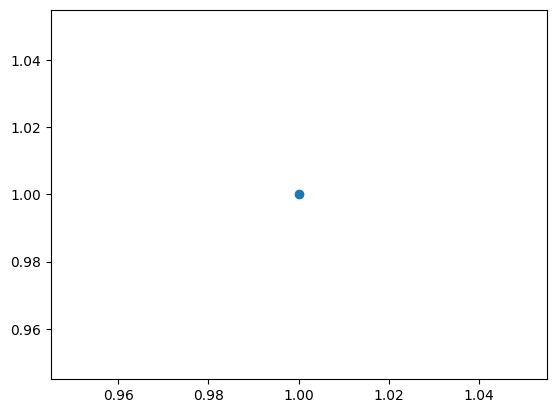

In [6]:
fig = plt.figure()
plt.scatter(1.0, 1.0)

# После нанесения графического элемента в виде маркера
# список текущих областей состоит из одной области
print (fig.axes)

plt.show()

**Контейнеры областей рисования (Axes containers)**

Axes - очень важный контейнер, так как именно с ним чаще всего работает пользователь. Экземпляры Axes - это области, располагающиеся в контейнере Figure, для которых можно задавать координатную систему (декартовая или полярная). На нём располагаются все другие контейнеры, кроме Figure, и графические примитивы. Это области на рисунке, на которых располагаются графики и диаграммы, в которые вставляются изображения и т.д. Мультиоконные рисунки состоят из набора областей Axes.

<class 'matplotlib.axes._axes.Axes'>


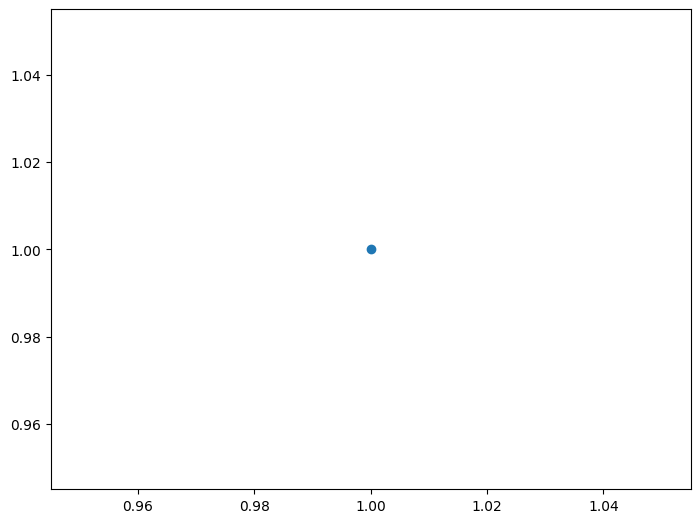

In [7]:
fig = plt.figure()

# Добавление на рисунок прямоугольной (по умолчанию) области рисования
ax = fig.add_axes([0, 0, 1, 1])
print(type(ax))

plt.scatter(1.0, 1.0)

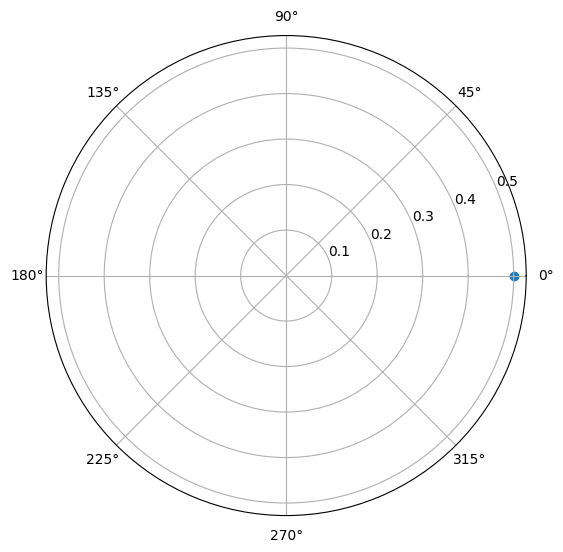

In [8]:
# Области разного типа

fig = plt.figure()

# Добавление на рисунок круговой области рисования
ax = fig.add_axes([0, 0, 1, 1], polar=True)
plt.scatter(0.0, 0.5)

plt.show()

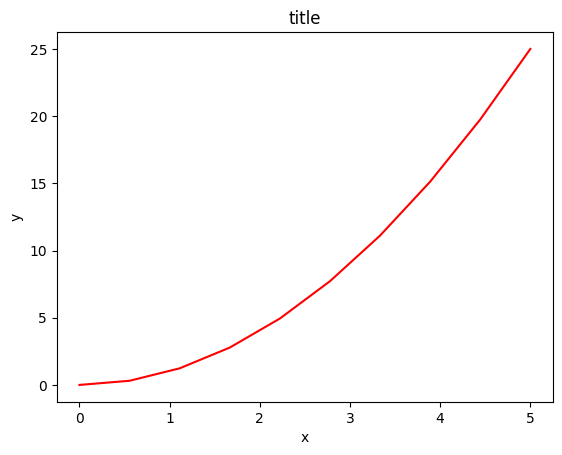

In [9]:
# Простой график функции
import numpy as np

# 10 чисел от 0 до 5
x = np.linspace(0, 5, 10)
y = x ** 2

plt.figure()

plt.plot(x, y, 'r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('title')

plt.show()

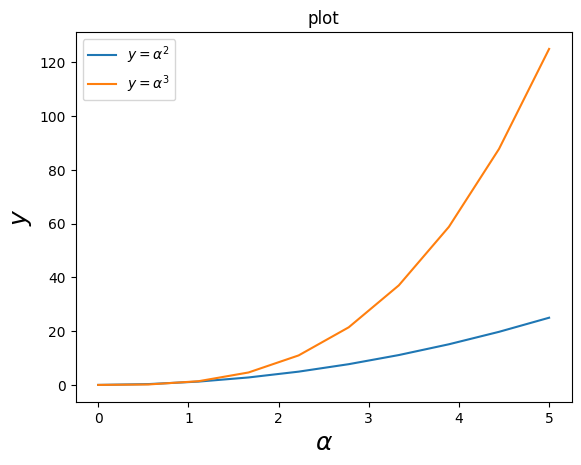

In [10]:
# Надписи + Latex

fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")

ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)

ax.set_title('plot')

# 2 - положение легенды на графике
ax.legend(loc=2)

Если необходимо создать два графика на одной и той же фигуре, то сначала создайте фигуру, потом оси, а затем нанесите все вместе.

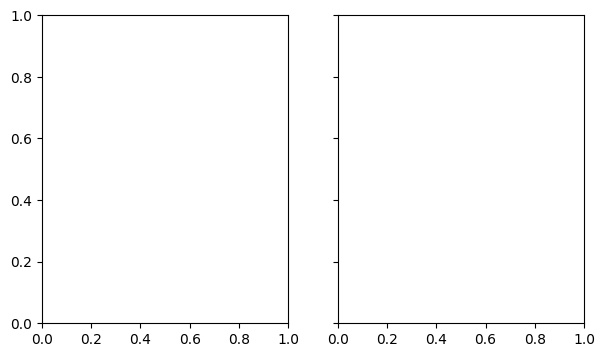

In [11]:
# Несколько графиков
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))

sharey=True используется, чтобы оси y применяли одни и те же метки.

Теперь можно построить графики, поместив один график на ax0, а другой на ax1.

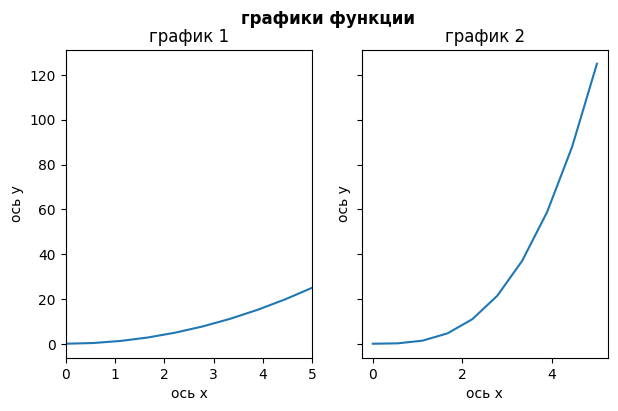

In [12]:
# Получаем фигуру и оси
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(7, 4))

ax0.plot(x, x**2, label=r"$y = \alpha^2$")
ax1.plot(x, x**3, label=r"$y = \alpha^3$")

ax0.set_xlim([0, 5])
ax0.set(title='график 1', xlabel='ось х', ylabel='ось у')

ax0.set_xlim([0, 5])
ax1.set(title='график 2', xlabel='ось х', ylabel='ось у')

# Заголовок фигуры
fig.suptitle('графики функции', fontsize=12, fontweight='bold');

# Скрываем легенды
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

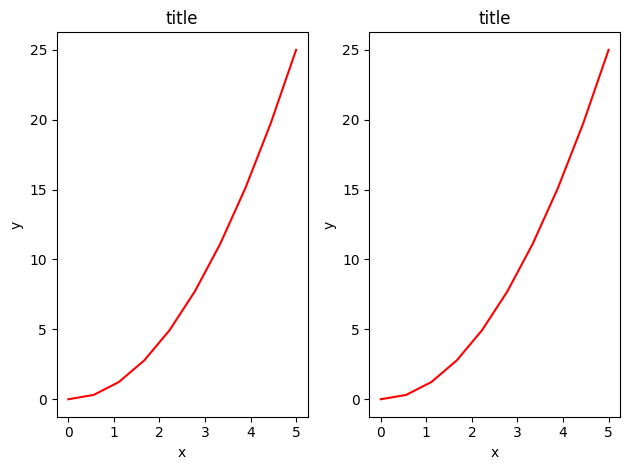

In [13]:
# Несколько графиков
#  plt.subplots - это функция, которая возвращает кортеж, содержащий объект фигуры и осей

fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# автоматически настраивает параметры подграфика так, чтобы подграфики вписывались в область рисунка
fig.tight_layout()

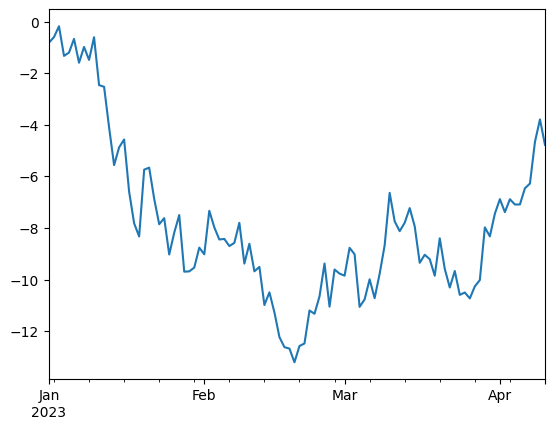

In [14]:
# График для объектов Series и DataFrame модуля pandas

ts = pd.Series(np.random.randn(100), index=pd.date_range('1/1/2023', periods=100))
ts = ts.cumsum()

ts.plot()

plt.show()

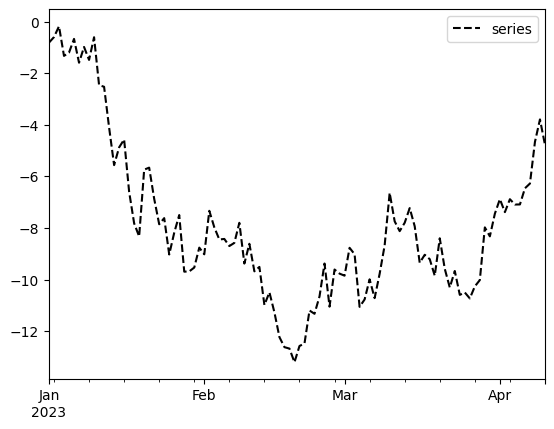

In [15]:
# стиль линий и легенда

plt.figure()
ts.plot(style='k--', label='series')

plt.legend()

plt.show()

<Figure size 640x480 with 0 Axes>

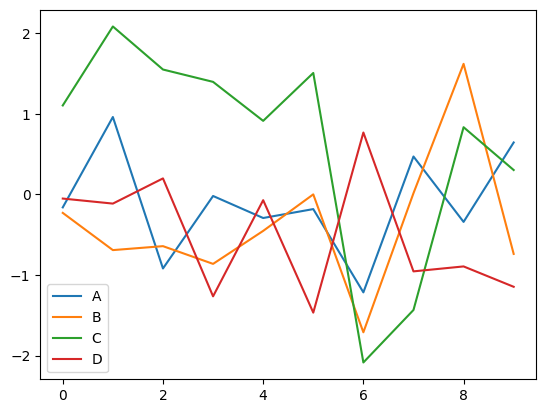

In [16]:
# Для данных из DataFrame

df = pd.DataFrame(np.random.randn(10,4), columns=['A','B','C','D'])

plt.figure()

df.plot()
plt.legend(loc='best')

plt.show()

<Axes: >

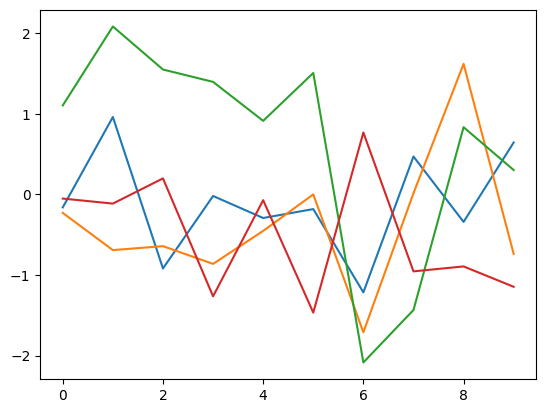

In [17]:
# Отключить легенду

df.plot(legend=False)

<Axes: ylabel='Density'>

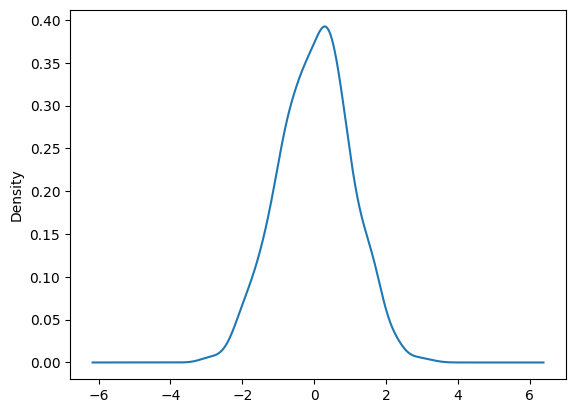

In [18]:
# График плотности распределения

distribution_density = pd.Series(np.random.randn(1000))

# kde = Kernel Density Estimation plot = density
distribution_density.plot(kind='kde')

# поменяйте kde на hist
#distribution_density.plot(kind='hist')

### 02. Графический анализ данных. Графики и выводы по ним

In [19]:
data_countries = [
    ['Исландия', 'Рейкьявик', 134_010, 274_500_00],
    ['Норвегия', 'Осло', 1_558_457, 454_000_000],
    ['Швеция', 'Стокгольм', 2_352_549, 188_000_000],
    ['Нидерланды', 'Амстердам', 872_757, 219_300_000],
    ['Швейцария','Берн', 133_000, 51_600_000]
]

In [20]:
geography = ['country', 'capital', 'population', 'square_kvm']

In [21]:
mini_map = pd.DataFrame(data=data_countries, columns=geography)

In [22]:
print(mini_map)

      country    capital  population  square_kvm
0    Исландия  Рейкьявик      134010    27450000
1    Норвегия       Осло     1558457   454000000
2      Швеция  Стокгольм     2352549   188000000
3  Нидерланды  Амстердам      872757   219300000
4   Швейцария       Берн      133000    51600000


In [23]:
mini_map

,country,capital,population,square_kvm
0,Исландия,Рейкьявик,134010,27450000
1,Норвегия,Осло,1558457,454000000
2,Швеция,Стокгольм,2352549,188000000
3,Нидерланды,Амстердам,872757,219300000
4,Швейцария,Берн,133000,51600000


### 02 Получение быстрого визуального представления о данных

**Задание.** Выполните простейший графический анализ данных, получите "беглое" представление о данных с помощью графиков.

<Axes: >

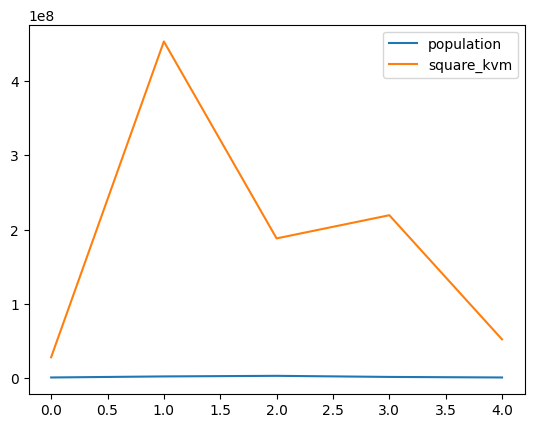

In [24]:
mini_map.plot()

Создается один линейный график для каждого из столбцов датафрейма с числовыми данными.

<Axes: >

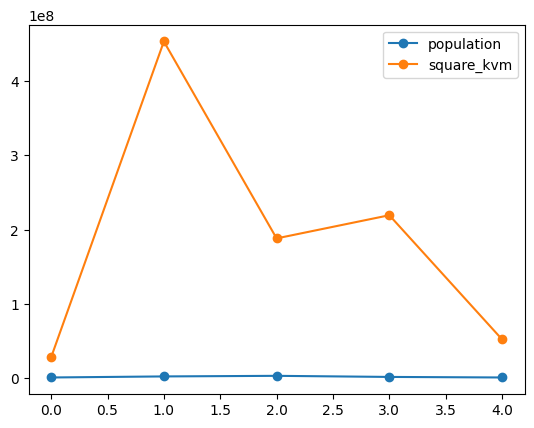

In [25]:
mini_map.plot(style='-o')

<Axes: >

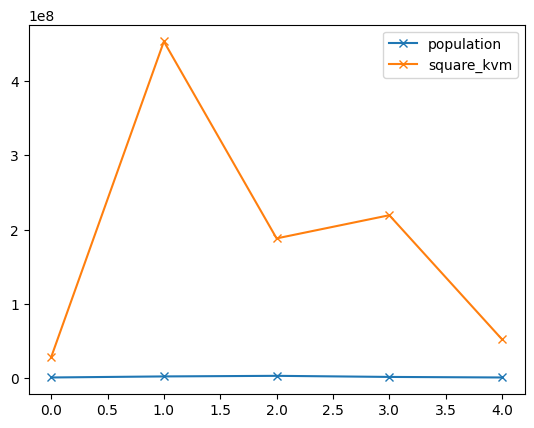

In [26]:
mini_map.plot(style='-x')

<Axes: >

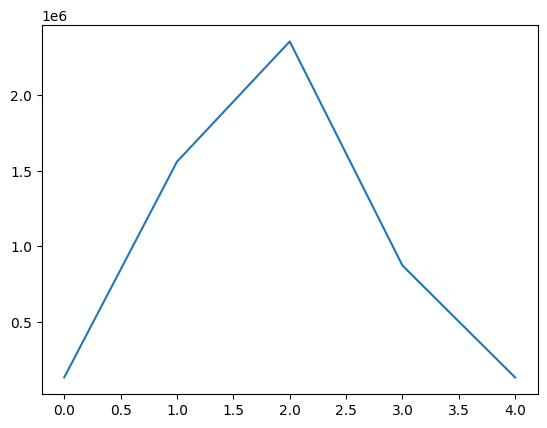

In [27]:
mini_map['population'].plot()

<Axes: >

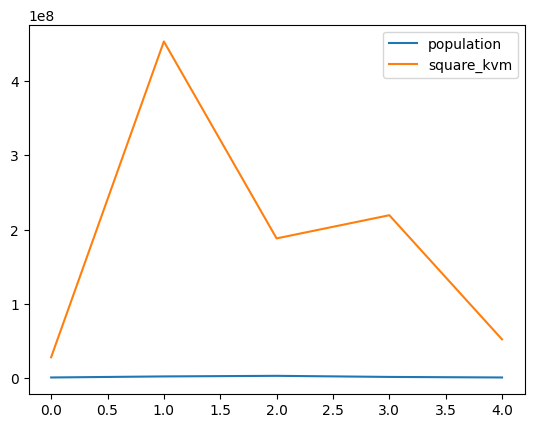

In [28]:
mini_map[['population', 'square_kvm']].plot()

У метода .plot() есть несколько необязательных параметров. В частности, параметр kind принимает одиннадцать различных строковых значений и определяет, какой тип графика создается:

- **area** для графиков с накоплением;
- **bar** для вертикальной гистограммы;
- **barh** для горизонтальной гистограммы;
- **box** для графиков с боксами;
- **hexbin** для 2D шестиугольных графиков;
- **hist** для гистограмм;
- **kde** для графика оценки плотности;
- **density** является альтернативным названием для kde;
- **line** для линейных графиков;
- **pie** для круговых графиков;
- **scatter** для графиков рассеяния.

<Axes: xlabel='population', ylabel='capital'>

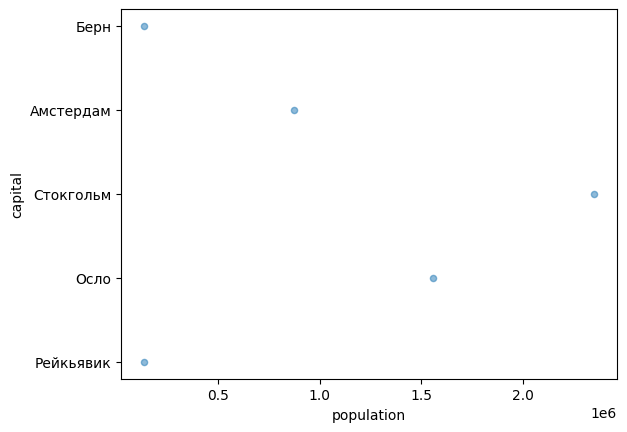

In [29]:
mini_map.plot.scatter(
    x='population',
    y='capital',
    alpha=0.5
)

Посмотрим, какие еще стандартные графики можно построить. В jupyter notebook используйте клавишу TAB, чтобы получить обзор доступных методов, например mini_map.plot.+ TAB

In [30]:
[method_name for method_name in dir(mini_map.plot) if not method_name.startswith("_")]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

In [31]:
#mini_map.plot.area(
#    x='population',
#    y='capital',
#    alpha=0.5
#)

<Axes: >

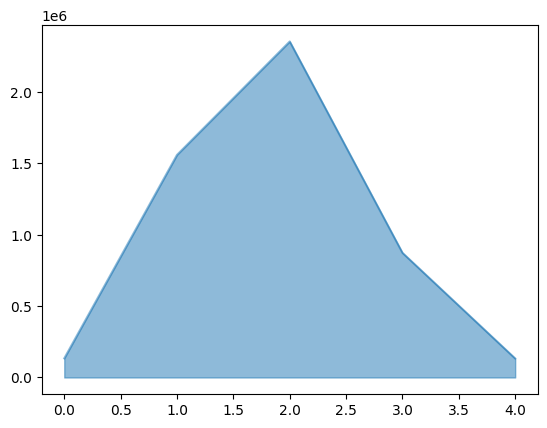

In [32]:
mini_map['population'].plot.area(alpha=0.5)

<Axes: >

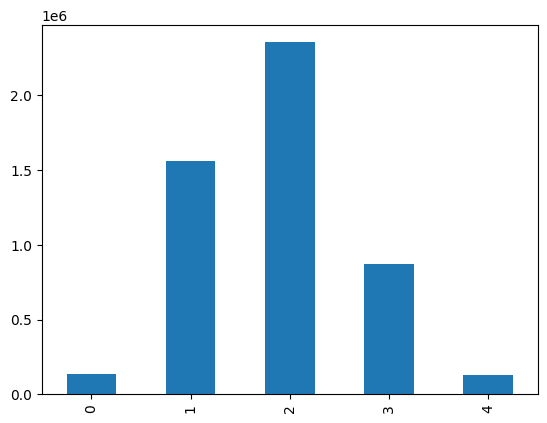

In [33]:
mini_map['population'].plot.bar()

<Axes: >

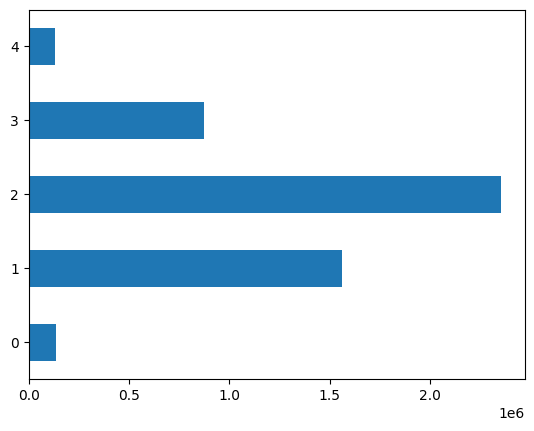

In [34]:
mini_map['population'].plot.barh()

<Axes: >

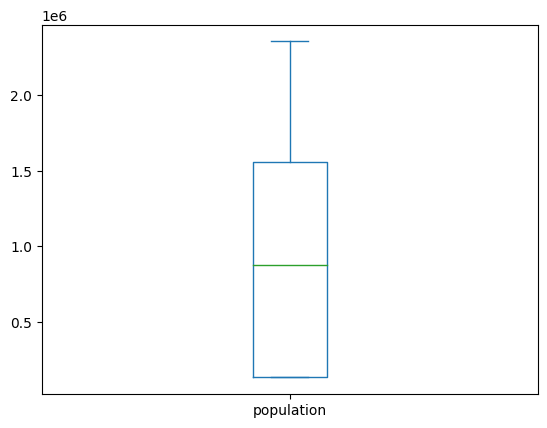

In [35]:
mini_map['population'].plot.box()

<Axes: ylabel='Density'>

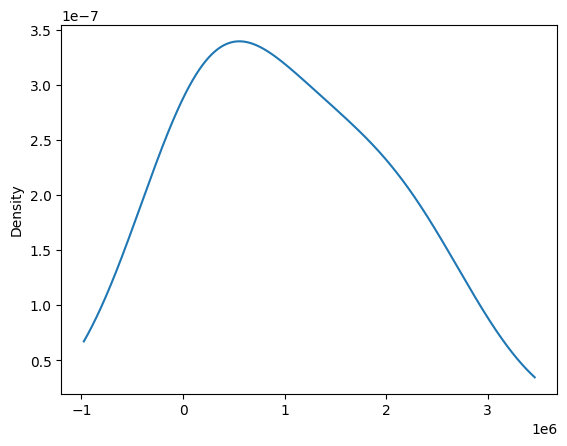

In [36]:
mini_map['population'].plot.density()

<Axes: xlabel='population', ylabel='square_kvm'>

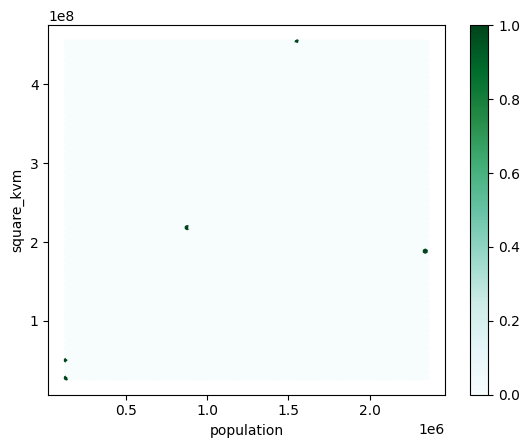

In [37]:
mini_map.plot.hexbin(
    x='population',
    y='square_kvm'
)

<Axes: ylabel='Frequency'>

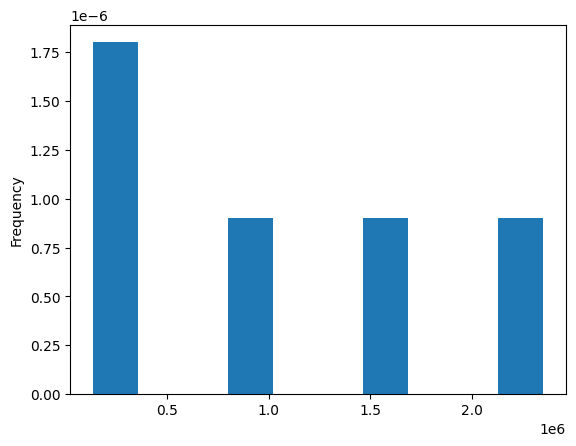

In [38]:
mini_map['population'].plot.hist(density=True)

Отличие от bar? Гистограмма относительных частот.

<Axes: ylabel='Density'>

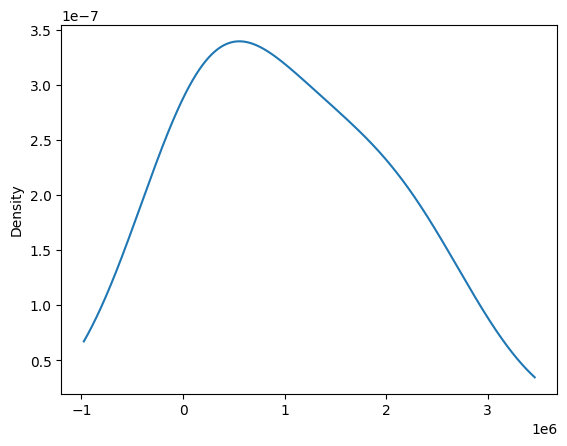

In [39]:
mini_map['population'].plot.kde()

<Axes: >

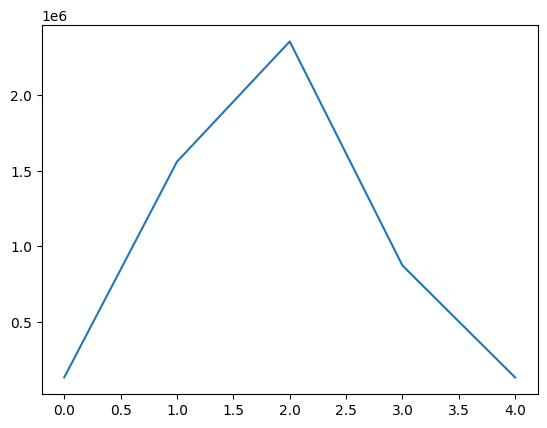

In [40]:
mini_map['population'].plot.line()

<Axes: ylabel='population'>

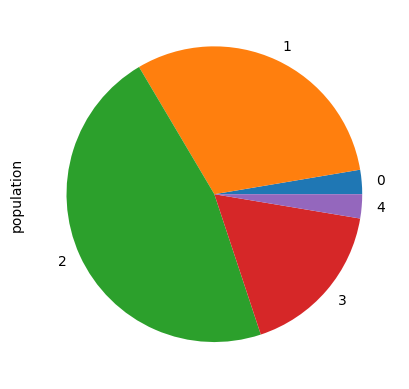

In [41]:
mini_map['population'].plot.pie()

Отображение каждого числового столбца в отдельном графике.

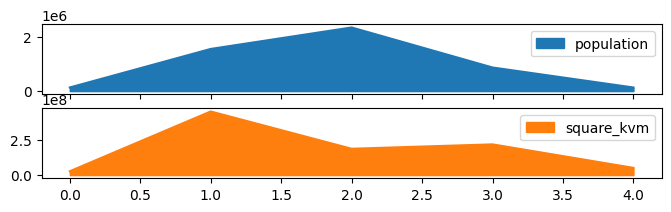

In [42]:
axs = mini_map.plot.area(figsize=(8, 2), subplots=True)

Детальный гайд по визуализации с помощью библиотеки matplotlib:<br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-other

### 03. Настройка графиков

Терминология matplotlib (Figure (фигура), Axes (оси) и т.д.)<br><br>
Важно понимать, что представляют из себя <br>
**Figure** - окончательное изображение, которое может содержать 1 или более осей (axes);<br>
**Axes** (оси) - отдельный график (plot).<br><br>
https://matplotlib.org/2.0.2/faq/usage_faq.html<br>
<img src=https://matplotlib.org/2.0.2/_images/anatomy1.png>

**Задание.** Выполните настройку элементов графика - гистограммы (bar chart).

У matplotlib есть много разных стилей, доступных для отображения графиков (plots). Чтобы просмотреть, какие из них доступны в  системе:

In [43]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Используем один из стилей:

In [44]:
#plt.style.use('dark_background')

<Axes: ylabel='capital'>

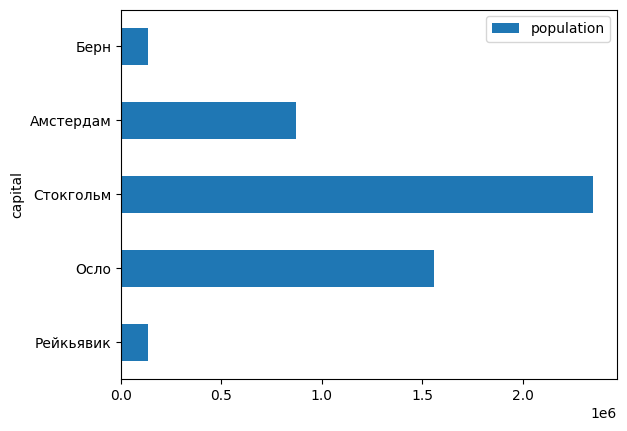

In [45]:
mini_map.plot(kind='barh', y='population', x='capital')

Настроим график, добавив необходимые элементы (заголовок, подписи осей и т.д.)

<Axes: ylabel='capital'>

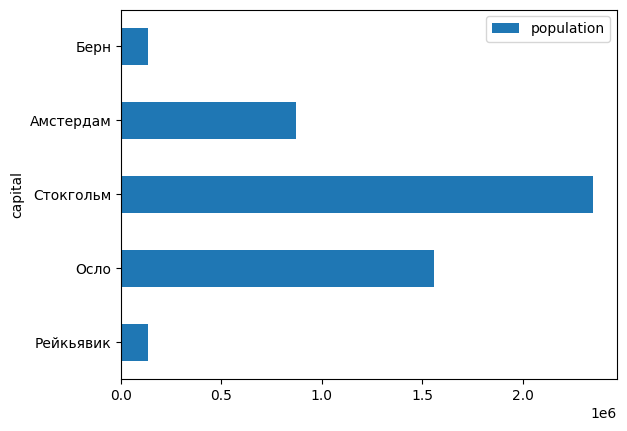

In [46]:
fig, ax = plt.subplots()

mini_map.plot(kind='barh', y='population', x='capital', ax=ax)

Благодаря вызову plt.subplots() и ax мы получаем доступ к осям (axes) и фигурам (figures) в matplotlib. Дальнейшая настройка графика будет выполняться с помощью объектов ax или fig. То есть будут доступны дополнительные возможности при настройке.

Настроим пределы x и изменим метки некоторых осей. При этом помним, что оси теперь в переменной ax.

Text(0, 0.5, 'capital')

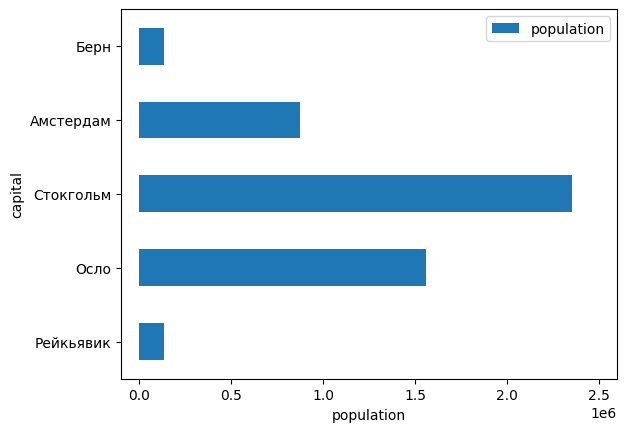

In [47]:
fig, ax = plt.subplots()

mini_map.plot(kind='barh', y='population', x='capital', ax=ax)

ax.set_xlim([-100_000, 2_600_000])
ax.set_xlabel('population')
ax.set_ylabel('capital')

[Text(0.5, 1.0, 'население столиц'),
 Text(0.5, 0, 'население'),
 Text(0, 0.5, 'столицы')]

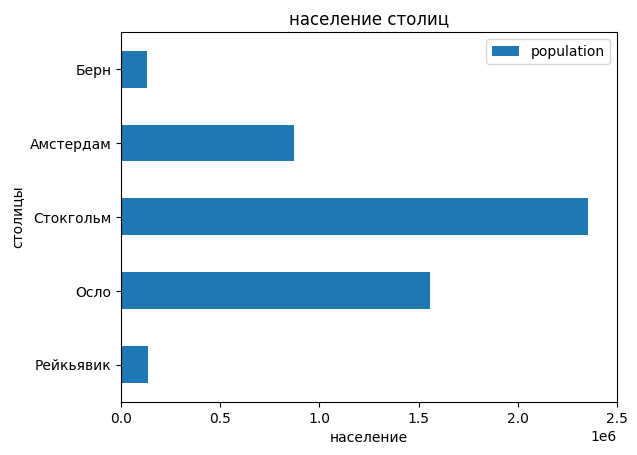

In [48]:
fig, ax = plt.subplots()

mini_map.plot(kind='barh', y='population', x='capital', ax=ax)

ax.set_xlim([0, 2_500_000])
ax.set(title='население столиц', xlabel='население', ylabel='столицы')

Настроим размер графика и видимость легенды.

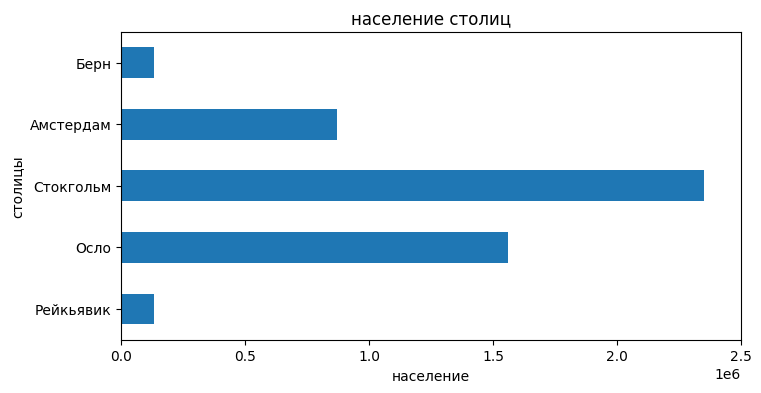

In [49]:
fig, ax = plt.subplots(figsize=(8, 4))

mini_map.plot(kind='barh', y='population', x='capital', ax=ax)

ax.set_xlim([0, 2_500_000])
ax.set(title='население столиц', xlabel='население', ylabel='столицы')

ax.legend().set_visible(False)

Добавим аннотацию к графику.

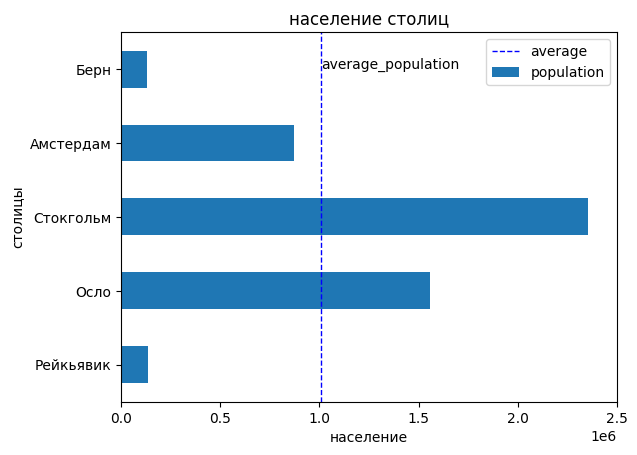

In [50]:
# Создаем новую фигуру и оси
fig, ax = plt.subplots()

# График данных и усредненное значение
mini_map.plot(kind='barh', y='population', x='capital', ax=ax)
avg = mini_map['population'].mean()

# Устанавливаем ограничения и метки
ax.set_xlim([0, 2_500_000])
ax.set(title='население столиц', xlabel='население', ylabel='столицы')

# Добавляем линию для среднего
ax.axvline(x=avg, color='b', label='average', linestyle='--', linewidth=1)

# Указываем подпись к линии
ax.text(avg, 4, 'average_population')

# Скрываем легенду
ax.legend().set_visible(True)

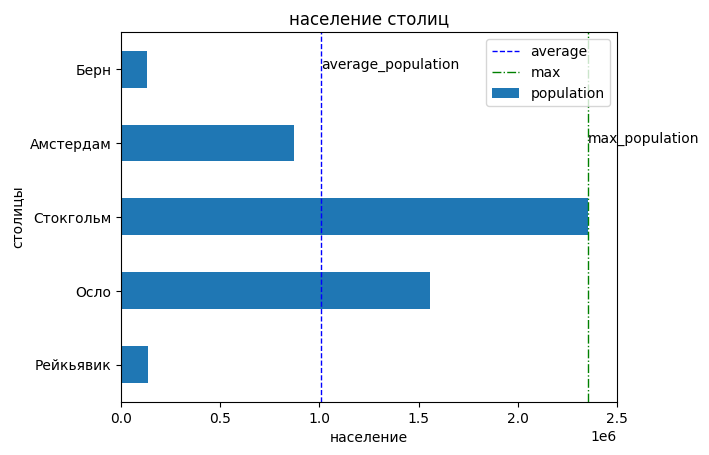

In [51]:
# Создаем новую фигуру и оси
fig, ax = plt.subplots()

# График данных и усредненное значение
mini_map.plot(kind='barh', y='population', x='capital', ax=ax)
avg = mini_map['population'].mean()
max_p = mini_map['population'].max()

# Устанавливаем ограничения и метки
ax.set_xlim([0, 2_500_000])
ax.set(title='население столиц', xlabel='население', ylabel='столицы')

# Добавляем линию для среднего
ax.axvline(x=avg, color='b', label='average', linestyle='--', linewidth=1)
ax.axvline(x=max_p, color='g', label='max', linestyle='-.', linewidth=1)

# Указываем подпись к линии
ax.text(avg, 4, 'average_population')
ax.text(max_p, 3, 'max_population')

# Скрываем легенду
ax.legend().set_visible(True)

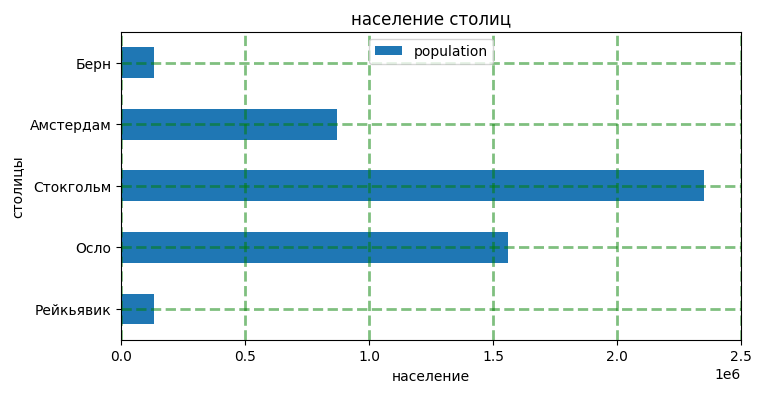

In [52]:
fig, ax = plt.subplots(figsize=(8, 4))

mini_map.plot(kind='barh', y='population', x='capital', ax=ax)

ax.set_xlim([0, 2_500_000])
ax.set(title='население столиц', xlabel='население', ylabel='столицы')

ax.grid(True, alpha=0.5, color='g', linestyle='--', linewidth=2)

ax.legend(loc='upper center')

**Задание.** Выполните настройку график pie chart (круговой диаграммы).<br>
Подсказка: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

<Axes: ylabel='population'>

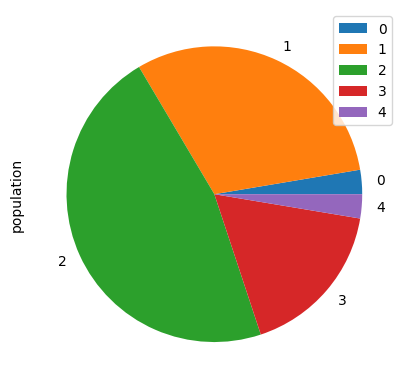

In [53]:
fig, ax = plt.subplots()

mini_map.plot(kind='pie', y='population', x='capital', ax=ax)

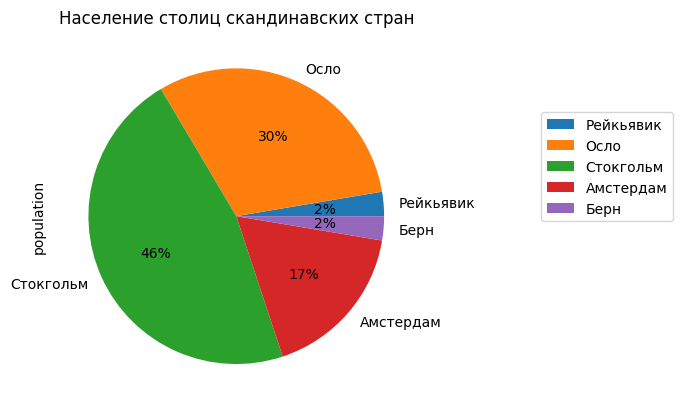

In [54]:
fig, ax = plt.subplots()

mini_map.plot(kind='pie', y='population', ax=ax, labels=mini_map['capital'].values, autopct='%i%%')

plt.title('Население столиц скандинавских стран')

ax.legend(loc='best', bbox_to_anchor=(1.7, 0.8))

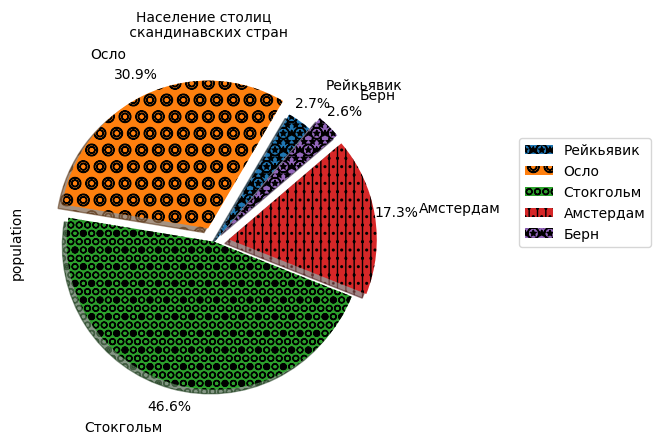

In [55]:
fig, ax = plt.subplots()

explode = (0, 0.1, 0, 0.1, 0.1)

mini_map.plot(
    kind='pie', y='population', ax=ax, labels=mini_map['capital'].values, autopct='%.1f%%',
    explode=explode, shadow=True, startangle=50, hatch=['**O', 'oO', 'O.O', '.||.', '**O'],
    pctdistance=1.15, labeldistance=1.3
)

fig.suptitle('Население столиц \n скандинавских стран', fontsize=10)

ax.legend(loc='best', bbox_to_anchor=(1.7, 0.8))

### 04. Графический анализ данных. Гистограммы

array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'C'}>, <Axes: title={'center': 'D'}>]],
      dtype=object)

<Figure size 640x480 with 0 Axes>

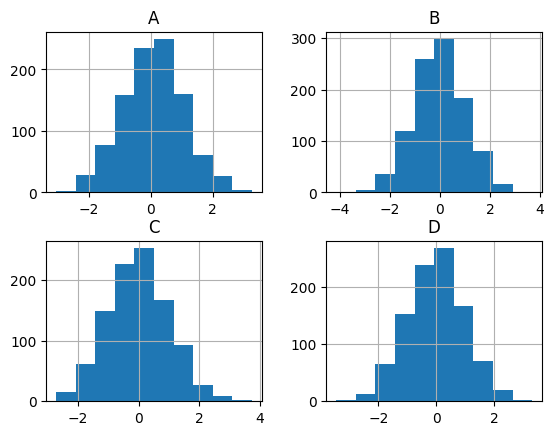

In [56]:
# метод pandas.DataFrame.hist вызывает метод matplotlib.pyplot.hist

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2023', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

plt.figure()

df.hist()

<Axes: ylabel='Frequency'>

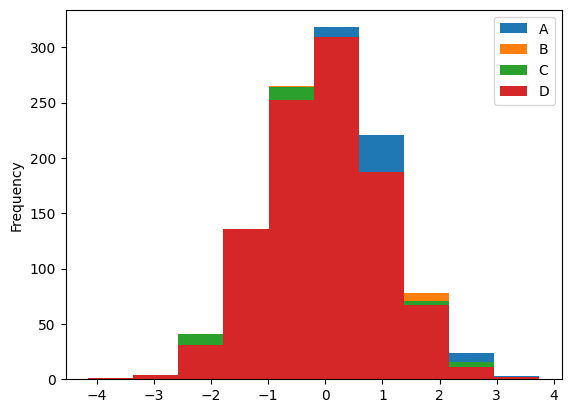

In [57]:
df.plot(kind='hist')

<Axes: ylabel='Frequency'>

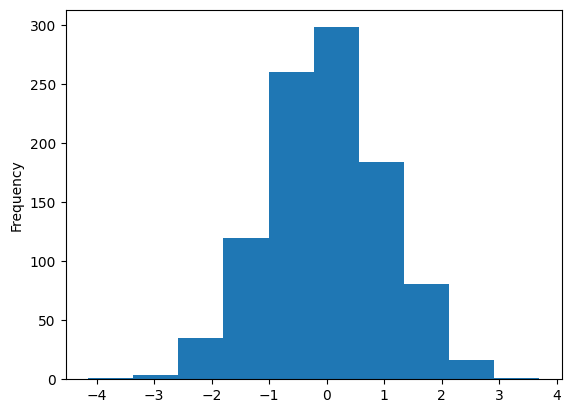

In [58]:
df['B'].plot(kind='hist')

<Axes: >

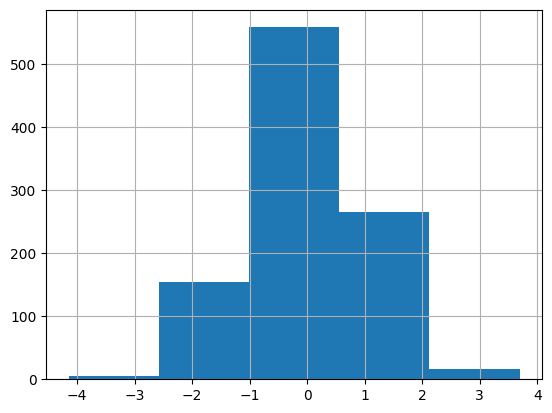

In [59]:
# число интервалов для построения гистограммы bins=10

df['B'].hist(bins=5)

<Axes: >

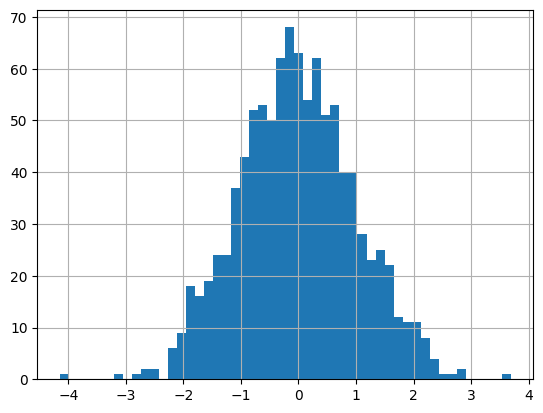

In [60]:
df['B'].hist(bins=50)

### 05. Графический анализ данных. Столбчатые диаграммы

<Axes: >

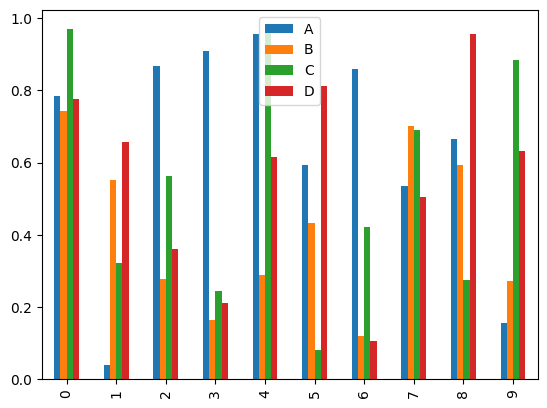

In [61]:
df = pd.DataFrame(np.random.rand(10,4), columns=['A','B','C','D'])

df.plot(kind='bar')

<Axes: >

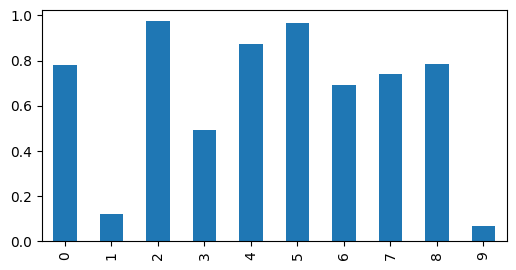

In [62]:
df = pd.DataFrame(np.random.rand(10,4), columns=['A','B','C','D'])

df['A'].plot(kind='bar', figsize=(6, 3))

<Axes: >

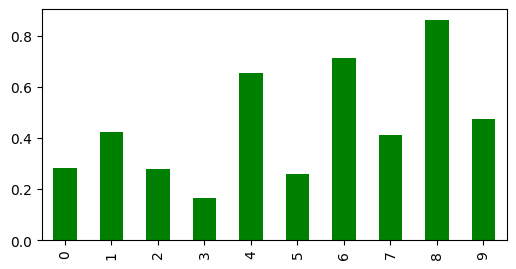

In [63]:
df = pd.DataFrame(np.random.rand(10,4), columns=['A','B','C','D'])

df['A'].plot(kind='bar', color='g', figsize=(6, 3))

<Axes: >

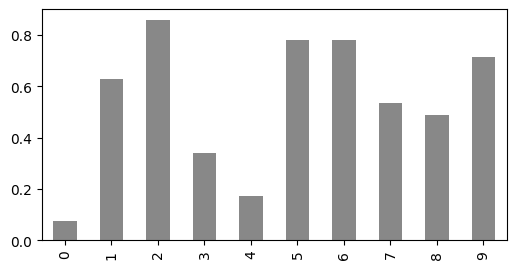

In [64]:
df = pd.DataFrame(np.random.rand(10,4), columns=['A','B','C','D'])

df['A'].plot(kind='bar', color='#888888', figsize=(6, 3))

<Axes: >

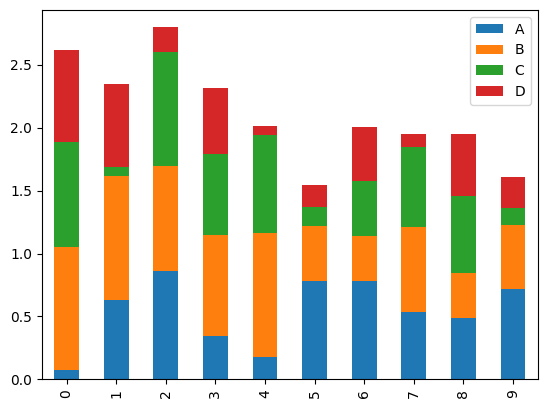

In [65]:
# Пропорциональное распределение значений, параметр stacked=True

df.plot(kind='bar', stacked=True)

<Axes: >

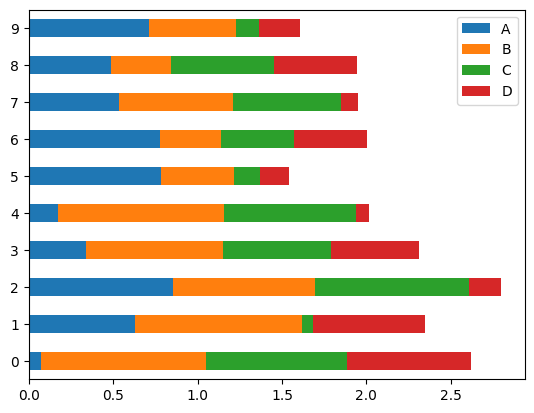

In [66]:
# Горизонтально kind='barh'

df.plot(kind='barh', stacked=True)

# Задание

1.	Создайте массив входных значений.
2.	Выберите 2 библиотечные функции numpy и 2 полинома.
3.	Постройте 4 различных графика.

- Оформление каждого графика должно отличаться от других.
- Выведите на нескольких графиках легенду, измените подписи к осям, используйте разные типы линий (и разную ширину), маркеры.
- Выведите подписи к экстремумам функции (1 график).
- Отобразите сетку на нескольких графиках.
  
4.	Разместите два графика в одной системе координат (совместные графики).

In [68]:
x = np.linspace(-35, 35, 500)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = 0.01 * x**3 - 0.3 * x
y4 = -0.02 * x**3 + 0.5 * x**2 - 2

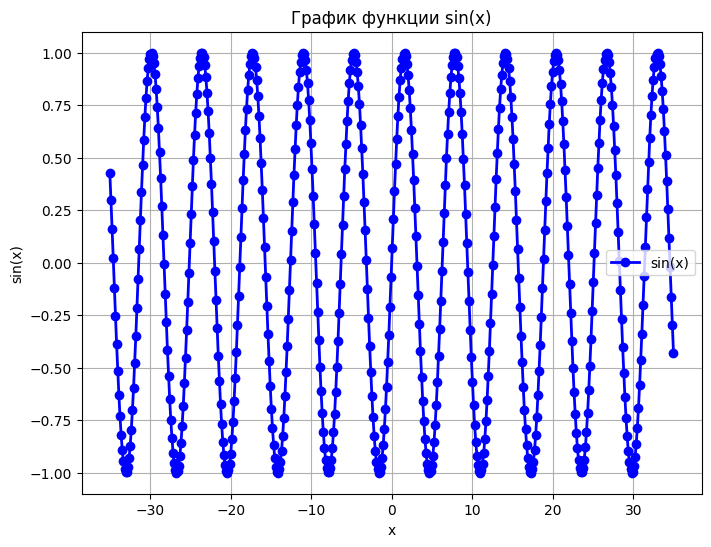

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='sin(x)', color='blue', linestyle='-', linewidth=2, marker='o')
plt.title('График функции sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)
plt.show()

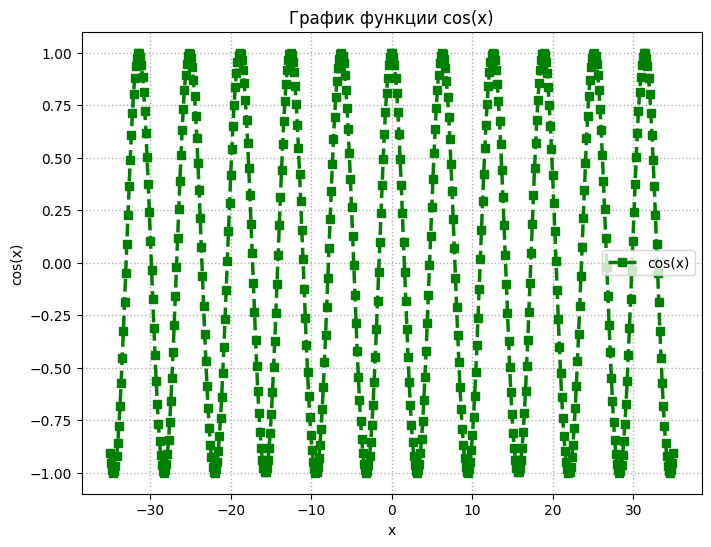

In [70]:
plt.figure(figsize=(8, 6))
plt.plot(x, y2, label='cos(x)', color='green', linestyle='--', linewidth=2.5, marker='s')
plt.title('График функции cos(x)')
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.legend()
plt.grid(True, which='both', linestyle=':', linewidth=1)
plt.show()

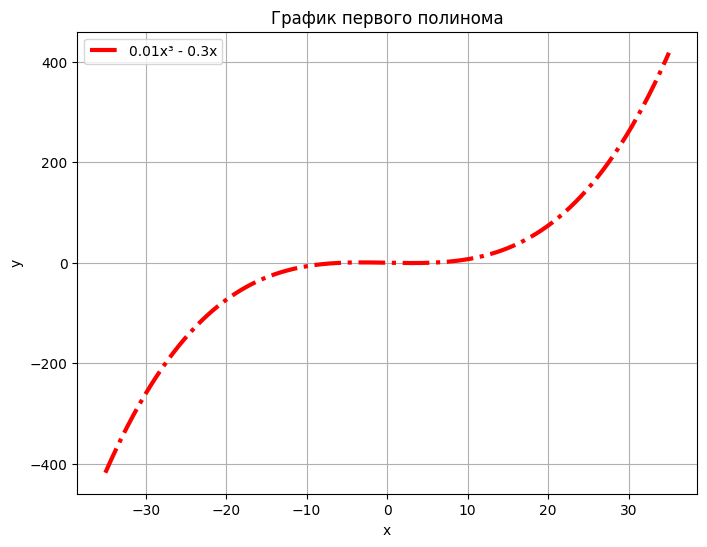

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(x, y3, label='0.01x³ - 0.3x', color='red', linestyle='-.', linewidth=3)
plt.title('График первого полинома')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

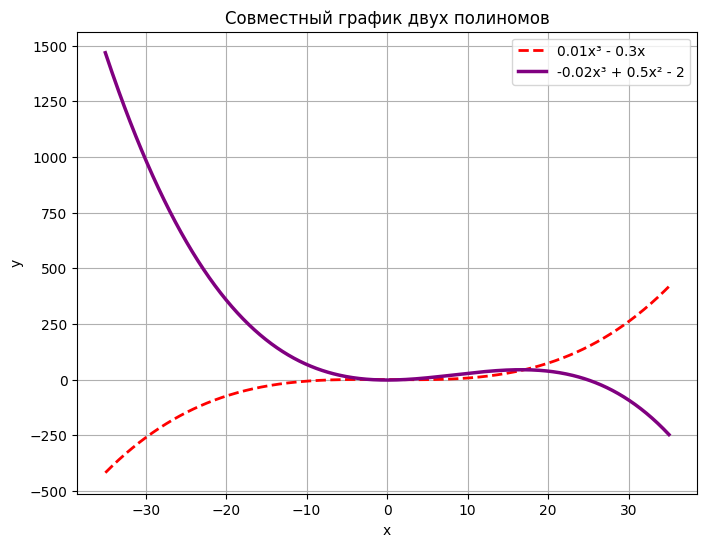

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(x, y3, label='0.01x³ - 0.3x', color='red', linestyle='--', linewidth=2)
plt.plot(x, y4, label='-0.02x³ + 0.5x² - 2', color='purple', linestyle='-', linewidth=2.5)
plt.title('Совместный график двух полиномов')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Задание

1. Создайте датафрейм, посвященный кинофильмам (название, режиссер, год выхода, бюджет, количество просмотров).
2. Выполните графический анализ датафрейма:
   - анализ стоимости кинокартины
   - анализ популярности кинокартины
   - анализ фильмов в хронологическом порядке
3. Используйте не менее 7 различных графиков.
4. Графики должны быть читабельны без обращения к исходным данным.

In [74]:
data = {
    'Название': ['Левиафан', 'Брат', 'Сталинград', 'Движение вверх', 'Т-34', 'Кинотавр', 'Собибор'],
    'Режиссер': ['Андрей Звягинцев', 'Алексей Балабанов', 'Фёдор Бондарчук', 'Антон Мегердичев', 'Алексей Сидоров',
                 'Андрей Звягинцев', 'Константин Хабенский'],
    'Год выхода': [2014, 1997, 2013, 2017, 2018, 2019, 2018],
    'Бюджет (млн ₽)': [220, 2.5, 1000, 750, 600, 100, 350],
    'Просмотры (млн)': [5.2, 15.0, 6.5, 12.3, 11.1, 3.8, 4.5]
}

df = pd.DataFrame(data)

print(df)

         Название              Режиссер  Год выхода  Бюджет (млн ₽)  \
0        Левиафан      Андрей Звягинцев        2014           220.0   
1            Брат     Алексей Балабанов        1997             2.5   
2      Сталинград       Фёдор Бондарчук        2013          1000.0   
3  Движение вверх      Антон Мегердичев        2017           750.0   
4            Т-34       Алексей Сидоров        2018           600.0   
5        Кинотавр      Андрей Звягинцев        2019           100.0   
6         Собибор  Константин Хабенский        2018           350.0   

   Просмотры (млн)  
0              5.2  
1             15.0  
2              6.5  
3             12.3  
4             11.1  
5              3.8  
6              4.5  


<ipython-input-92-67ef24c88321>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Название', y='Бюджет (млн ₽)', data=df, palette='Blues_d')


Text(0, 0.5, 'Бюджет (млн ₽)')

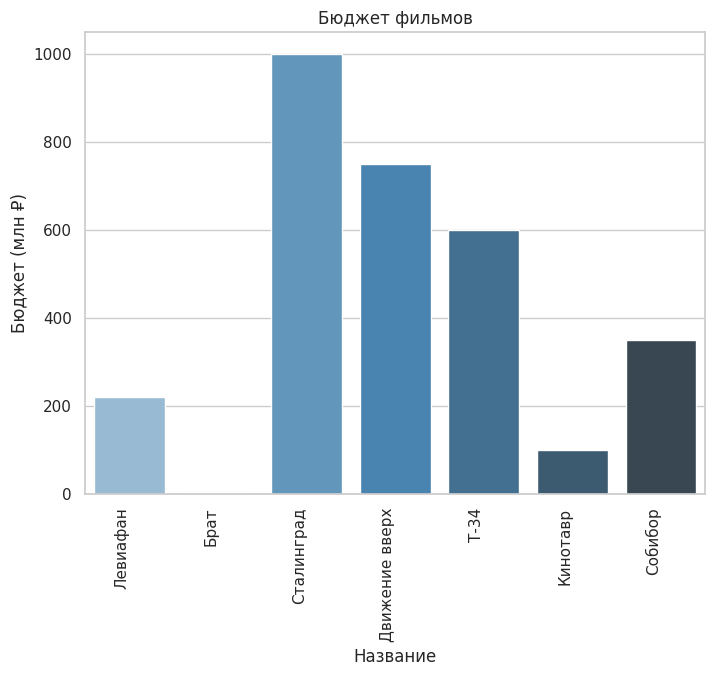

In [92]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Название', y='Бюджет (млн ₽)', data=df, palette='Blues_d')
plt.title('Бюджет фильмов')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Бюджет (млн ₽)')

<ipython-input-93-4560a4757cca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Название', y='Просмотры (млн)', data=df, palette='Oranges_d')


Text(0, 0.5, 'Просмотры (млн)')

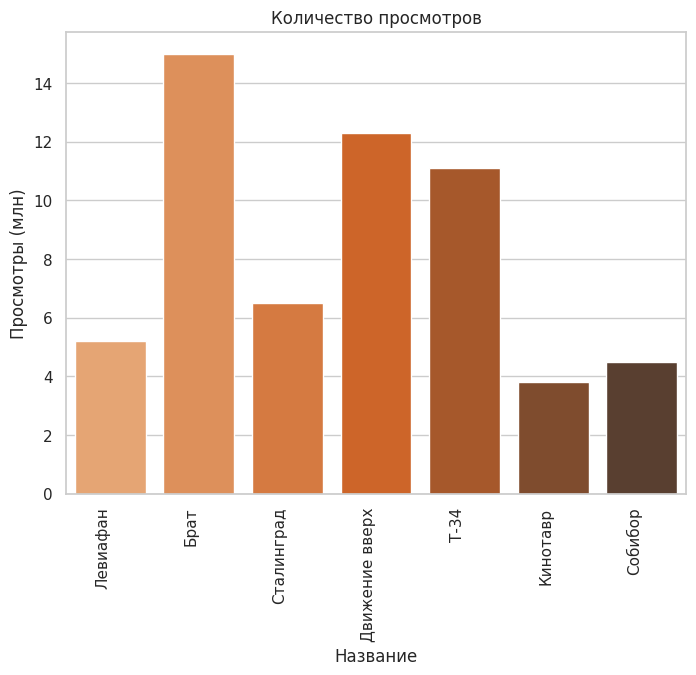

In [93]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Название', y='Просмотры (млн)', data=df, palette='Oranges_d')
plt.title('Количество просмотров')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Просмотры (млн)')

Text(0, 0.5, 'Бюджет (млн ₽)')

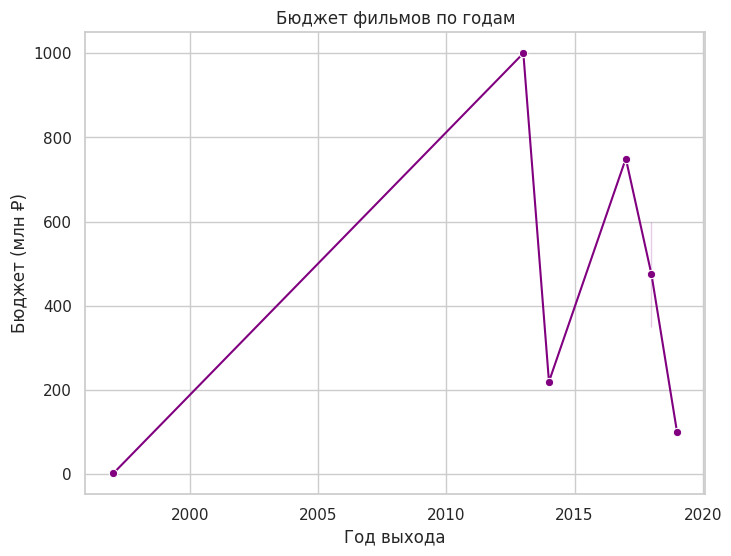

In [94]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Год выхода', y='Бюджет (млн ₽)', data=df, marker='o', color='purple')
plt.title('Бюджет фильмов по годам')
plt.ylabel('Бюджет (млн ₽)')

Text(0, 0.5, 'Просмотры (млн)')

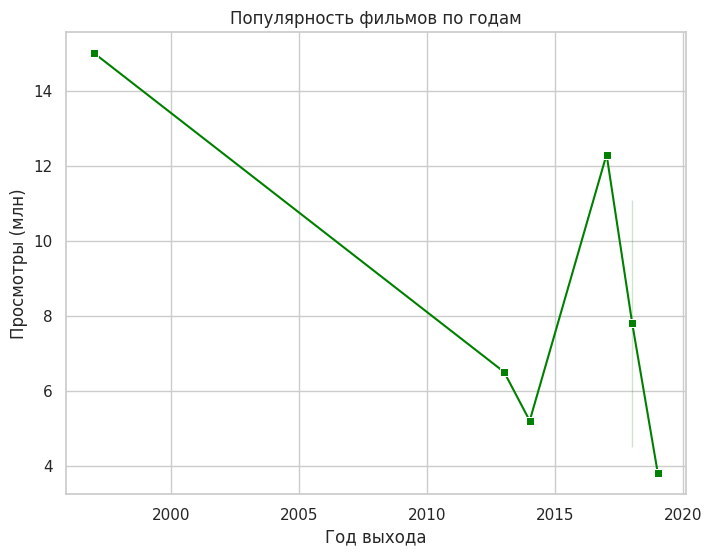

In [95]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Год выхода', y='Просмотры (млн)', data=df, marker='s', color='green')
plt.title('Популярность фильмов по годам')
plt.ylabel('Просмотры (млн)')

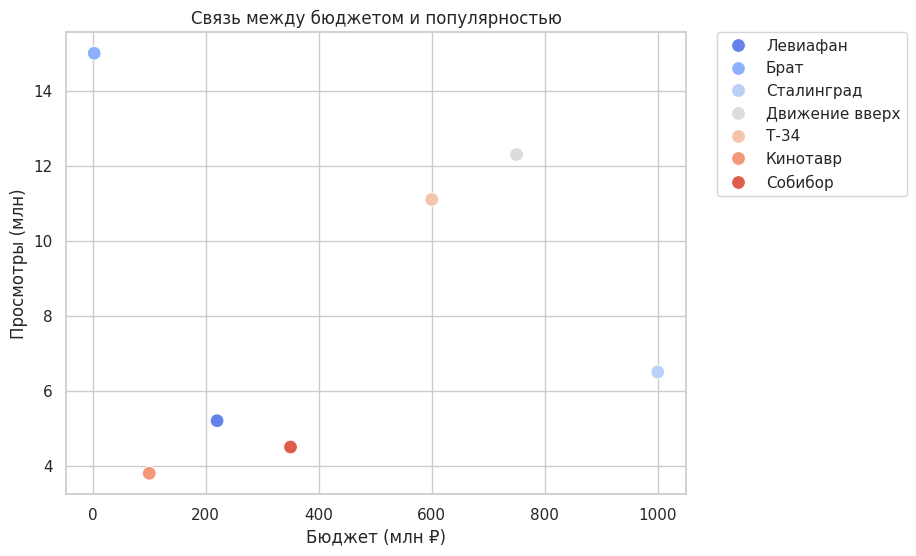

In [96]:
# 5. Диаграмма рассеяния: Бюджет vs. Просмотры
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Бюджет (млн ₽)', y='Просмотры (млн)', hue='Название', data=df, palette='coolwarm', s=100)
plt.title('Связь между бюджетом и популярностью')
plt.xlabel('Бюджет (млн ₽)')
plt.ylabel('Просмотры (млн)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, 'Распределение бюджетов фильмов')

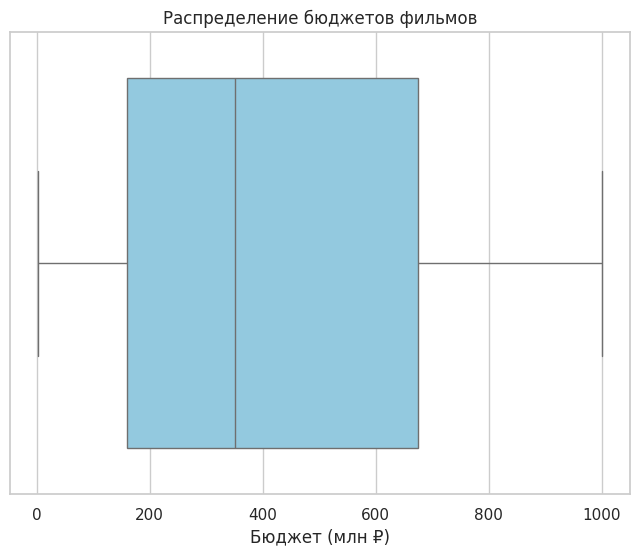

In [97]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Бюджет (млн ₽)', data=df, color='skyblue')
plt.title('Распределение бюджетов фильмов')

Text(0.5, 1.0, 'Доля просмотров по фильмам')

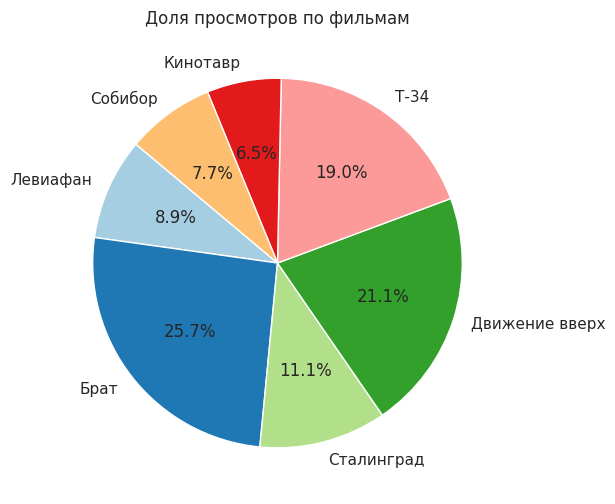

In [99]:
plt.figure(figsize=(8, 6))
plt.pie(df['Просмотры (млн)'], labels=df['Название'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired"))
plt.title('Доля просмотров по фильмам')